In [1]:
import numpy as np
import pandas as pd

In [2]:
trees = pd.read_csv("Street_Tree_List-2022-01-30_FILTERED.csv")
trees.head()

,TreeID,qLegalStatus,qSpecies,qAddress,SiteOrder,qSiteInfo,qCaretaker,PlantDate,DBH,PlotSize,Latitude,Longitude
0,200311,DPW Maintained,Liquidambar styraciflua 'Rotundiloba' :: Round...,300 Spear St,9.0,Sidewalk: Curb side : Yard,Private,NaN,5,NaN,37.789193,-122.390006
1,10425,DPW Maintained,Schinus terebinthifolius :: Brazilian Pepper,1419 Haight St,2.0,Sidewalk: Curb side : Cutout,DPW,NaN,90,3x3,37.770094,-122.445693
2,43163,DPW Maintained,Acacia melanoxylon :: Blackwood Acacia,222 Madison St,1.0,Sidewalk: Curb side : Cutout,Private,7/11/00 0:00,8,NaN,37.726036,-122.422690
3,188921,DPW Maintained,Callistemon citrinus :: Lemon Bottlebrush,2001 25th St,16.0,Sidewalk: Property side : Yard,Private,NaN,6,Width 8ft,37.751955,-122.399482
4,643,DPW Maintained,Ficus microcarpa :: Chinese Banyan,3224 24th St,1.0,Sidewalk: Curb side : Cutout,Private,NaN,18,3x3,37.752398,-122.416772


In [3]:
trees.shape

(37118, 12)

In [4]:
trees.isna().sum()

TreeID              0
qLegalStatus        9
qSpecies            0
qAddress            0
SiteOrder         130
qSiteInfo           0
qCaretaker          0
PlantDate       27781
DBH                 0
PlotSize         5424
Latitude            0
Longitude           0
dtype: int64

In [5]:
trees.PlantDate

0                 NaN
1                 NaN
2        7/11/00 0:00
3                 NaN
4                 NaN
             ...     
37113             NaN
37114             NaN
37115    1/22/85 0:00
37116             NaN
37117             NaN
Name: PlantDate, Length: 37118, dtype: object

In [6]:
trees.qLegalStatus.unique()

array(['DPW Maintained', 'Permitted Site', 'Section 806 (d)',
       'Undocumented', 'Significant Tree', 'Prune Opt Out',
       'Planning Code 138.1 required', 'Private', 'Section 143',
       'Landmark tree', 'Property Tree', nan,
       'Street Tree Maintenance Opt Out'], dtype=object)

In [7]:
trees.qCaretaker.unique()

array(['Private', 'DPW', 'Police Dept', 'Port', 'SFUSD', 'PUC',
       'Rec/Park', 'DPW for City Agency', 'Fire Dept',
       'Mayor Office of Housing', 'MTA', 'Public Library',
       'Arts Commission', 'Dept of Real Estate', 'Purchasing Dept',
       'Health Dept', 'Mission Verde', 'Housing Authority',
       'Office of Mayor', 'City College', 'Asian Arts Commission',
       'War Memorial'], dtype=object)

In [8]:
trees.qSiteInfo.unique()

array(['Sidewalk: Curb side : Yard', 'Sidewalk: Curb side : Cutout',
       'Sidewalk: Property side : Yard', 'Back Yard : Yard',
       'Side Yard : Yard', 'Front Yard : Yard', 'Median : Yard',
       'Median : Cutout', 'Sidewalk: Curb side : Pot', 'Median :',
       'Sidewalk: Property side : Cutout', 'unknown : Yard',
       'Unaccepted Street : Yard', 'Front Yard : Pot',
       'Side Yard : Cutout', ': Yard', 'Front Yard : Cutout',
       'Sidewalk: Property side : Pot', ': Cutout',
       'Unaccepted Street : Cutout', 'Back Yard : Cutout',
       'Sidewalk: Curb side :', 'Sidewalk: Curb side : Hanging Pot'],
      dtype=object)

# Extracting the common names of the species of tree

In [9]:
trees['qSpecies'].value_counts()

Platanus x hispanica :: Sycamore: London Plane    2633
Metrosideros excelsa :: New Zealand Xmas Tree     1937
Lophostemon confertus :: Brisbane Box             1727
Pittosporum undulatum :: Victorian Box            1669
Tristaniopsis laurina :: Swamp Myrtle             1577
                                                  ... 
Cycas revoluta :: Sago palm                          1
Juglans hindsii :: Walnut: Black (n.calif)           1
Eucalyptus saligna :: Sidney Blue Gum                1
Quercus alba :: White oak                            1
Styrax japonicus :: Japanese Snowdrop Tree           1
Name: qSpecies, Length: 419, dtype: int64

In [10]:
x = trees['qSpecies'].str.split(":: ", expand = True)
x

,0,1
0,Liquidambar styraciflua 'Rotundiloba',Roundleaf sweetgum
1,Schinus terebinthifolius,Brazilian Pepper
2,Acacia melanoxylon,Blackwood Acacia
3,Callistemon citrinus,Lemon Bottlebrush
4,Ficus microcarpa,Chinese Banyan
...,...,...
37113,Magnolia grandiflora,Southern Magnolia
37114,Agonis flexuosa,Peppermint Willow
37115,Eriobotrya deflexa,Bronze Loquat
37116,Ficus microcarpa nitida 'Green Gem',Indian Laurel Fig Tree 'Green Gem'


In [11]:
trees['Scientific_Name'] = x[0]
trees['Common_Name'] = x[1]
trees

,TreeID,qLegalStatus,qSpecies,qAddress,SiteOrder,qSiteInfo,qCaretaker,PlantDate,DBH,PlotSize,Latitude,Longitude,Scientific_Name,Common_Name
0,200311,DPW Maintained,Liquidambar styraciflua 'Rotundiloba' :: Round...,300 Spear St,9.0,Sidewalk: Curb side : Yard,Private,NaN,5,NaN,37.789193,-122.390006,Liquidambar styraciflua 'Rotundiloba',Roundleaf sweetgum
1,10425,DPW Maintained,Schinus terebinthifolius :: Brazilian Pepper,1419 Haight St,2.0,Sidewalk: Curb side : Cutout,DPW,NaN,90,3x3,37.770094,-122.445693,Schinus terebinthifolius,Brazilian Pepper
2,43163,DPW Maintained,Acacia melanoxylon :: Blackwood Acacia,222 Madison St,1.0,Sidewalk: Curb side : Cutout,Private,7/11/00 0:00,8,NaN,37.726036,-122.422690,Acacia melanoxylon,Blackwood Acacia
3,188921,DPW Maintained,Callistemon citrinus :: Lemon Bottlebrush,2001 25th St,16.0,Sidewalk: Property side : Yard,Private,NaN,6,Width 8ft,37.751955,-122.399482,Callistemon citrinus,Lemon Bottlebrush
4,643,DPW Maintained,Ficus microcarpa :: Chinese Banyan,3224 24th St,1.0,Sidewalk: Curb side : Cutout,Private,NaN,18,3x3,37.752398,-122.416772,Ficus microcarpa,Chinese Banyan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37113,141243,DPW Maintained,Magnolia grandiflora :: Southern Magnolia,31 COMMONWEALTH AVE,1.0,Sidewalk: Curb side : Yard,Private,NaN,10,Width 0ft,37.785434,-122.455909,Magnolia grandiflora,Southern Magnolia
37114,203553,DPW Maintained,Agonis flexuosa :: Peppermint Willow,259 Faxon Ave,1.0,Sidewalk: Curb side : Cutout,Private,NaN,2,Width 3ft,37.719278,-122.460296,Agonis flexuosa,Peppermint Willow
37115,61778,DPW Maintained,Eriobotrya deflexa :: Bronze Loquat,2219 24th St,1.0,Sidewalk: Curb side : Cutout,Private,1/22/85 0:00,13,NaN,37.753203,-122.401882,Eriobotrya deflexa,Bronze Loquat
37116,190242,DPW Maintained,Ficus microcarpa nitida 'Green Gem' :: Indian ...,60 New Montgomery St,3.0,Sidewalk: Curb side : Pot,Private,NaN,2,Width 3ft,37.788459,-122.401854,Ficus microcarpa nitida 'Green Gem',Indian Laurel Fig Tree 'Green Gem'


In [13]:
#different common species of trees 
len(trees['Common_Name'].unique())

404

In [13]:
trees['Common_Name'].value_counts()

Sycamore: London Plane    2633
New Zealand Xmas Tree     1937
Brisbane Box              1727
Victorian Box             1669
Swamp Myrtle              1577
                          ... 
Puriri tree                  1
Chilean Wine Palm            1
Sago palm                    1
Drumstick tree               1
Triangle palm                1
Name: Common_Name, Length: 403, dtype: int64

In [14]:
trees_top4species = trees.loc[(trees['Common_Name'] == "Sycamore: London Plane") | (trees['Common_Name'] == "New Zealand Xmas Tree") | (trees['Common_Name'] == "Brisbane Box")| (trees['Common_Name'] == "Victorian Box")]

trees_top4species

,TreeID,qLegalStatus,qSpecies,qAddress,SiteOrder,qSiteInfo,qCaretaker,PlantDate,DBH,PlotSize,Latitude,Longitude,Scientific_Name,Common_Name
6,133773,DPW Maintained,Platanus x hispanica :: Sycamore: London Plane,2460 Scott St,1.0,Sidewalk: Curb side : Cutout,Private,NaN,16,Width 4ft,37.792467,-122.439533,Platanus x hispanica,Sycamore: London Plane
8,209974,DPW Maintained,Metrosideros excelsa :: New Zealand Xmas Tree,634 Miramar Ave,1.0,Sidewalk: Curb side : Cutout,Private,NaN,6,Width 3ft,37.728313,-122.458106,Metrosideros excelsa,New Zealand Xmas Tree
13,29149,DPW Maintained,Lophostemon confertus :: Brisbane Box,301X Jones St,1.0,Sidewalk: Curb side : Cutout,DPW,6/13/15 0:00,3,3x3,37.783950,-122.412686,Lophostemon confertus,Brisbane Box
15,134799,DPW Maintained,Platanus x hispanica :: Sycamore: London Plane,1070 Lombard St,3.0,Sidewalk: Curb side : Yard,Private,NaN,9,NaN,37.802131,-122.419147,Platanus x hispanica,Sycamore: London Plane
19,177625,DPW Maintained,Metrosideros excelsa :: New Zealand Xmas Tree,600 Italy Ave,2.0,Sidewalk: Curb side : Cutout,Private,NaN,8,Width 2ft,37.716030,-122.434553,Metrosideros excelsa,New Zealand Xmas Tree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37084,9897,DPW Maintained,Lophostemon confertus :: Brisbane Box,1800X Pine St,3.0,Sidewalk: Curb side : Cutout,DPW,1/31/17 11:04,3,3X3,37.788920,-122.426579,Lophostemon confertus,Brisbane Box
37096,2854,DPW Maintained,Platanus x hispanica :: Sycamore: London Plane,1325 California St,1.0,Sidewalk: Curb side : Cutout,Private,NaN,45,3X3,37.791060,-122.416209,Platanus x hispanica,Sycamore: London Plane
37102,1457,DPW Maintained,Pittosporum undulatum :: Victorian Box,160 Arguello Blvd,1.0,Sidewalk: Curb side : Cutout,DPW,3/29/18 0:00,3,3X3,37.787257,-122.459200,Pittosporum undulatum,Victorian Box
37103,20922,DPW Maintained,Metrosideros excelsa :: New Zealand Xmas Tree,1903X Sunset Blvd,5.0,Sidewalk: Curb side : Cutout,DPW,NaN,12,10,37.751506,-122.494961,Metrosideros excelsa,New Zealand Xmas Tree


In [15]:
trees_top4species.to_csv('swz8Processed.csv')

In [16]:
trees

,TreeID,qLegalStatus,qSpecies,qAddress,SiteOrder,qSiteInfo,qCaretaker,PlantDate,DBH,PlotSize,Latitude,Longitude,Scientific_Name,Common_Name
0,200311,DPW Maintained,Liquidambar styraciflua 'Rotundiloba' :: Round...,300 Spear St,9.0,Sidewalk: Curb side : Yard,Private,NaN,5,NaN,37.789193,-122.390006,Liquidambar styraciflua 'Rotundiloba',Roundleaf sweetgum
1,10425,DPW Maintained,Schinus terebinthifolius :: Brazilian Pepper,1419 Haight St,2.0,Sidewalk: Curb side : Cutout,DPW,NaN,90,3x3,37.770094,-122.445693,Schinus terebinthifolius,Brazilian Pepper
2,43163,DPW Maintained,Acacia melanoxylon :: Blackwood Acacia,222 Madison St,1.0,Sidewalk: Curb side : Cutout,Private,7/11/00 0:00,8,NaN,37.726036,-122.422690,Acacia melanoxylon,Blackwood Acacia
3,188921,DPW Maintained,Callistemon citrinus :: Lemon Bottlebrush,2001 25th St,16.0,Sidewalk: Property side : Yard,Private,NaN,6,Width 8ft,37.751955,-122.399482,Callistemon citrinus,Lemon Bottlebrush
4,643,DPW Maintained,Ficus microcarpa :: Chinese Banyan,3224 24th St,1.0,Sidewalk: Curb side : Cutout,Private,NaN,18,3x3,37.752398,-122.416772,Ficus microcarpa,Chinese Banyan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37113,141243,DPW Maintained,Magnolia grandiflora :: Southern Magnolia,31 COMMONWEALTH AVE,1.0,Sidewalk: Curb side : Yard,Private,NaN,10,Width 0ft,37.785434,-122.455909,Magnolia grandiflora,Southern Magnolia
37114,203553,DPW Maintained,Agonis flexuosa :: Peppermint Willow,259 Faxon Ave,1.0,Sidewalk: Curb side : Cutout,Private,NaN,2,Width 3ft,37.719278,-122.460296,Agonis flexuosa,Peppermint Willow
37115,61778,DPW Maintained,Eriobotrya deflexa :: Bronze Loquat,2219 24th St,1.0,Sidewalk: Curb side : Cutout,Private,1/22/85 0:00,13,NaN,37.753203,-122.401882,Eriobotrya deflexa,Bronze Loquat
37116,190242,DPW Maintained,Ficus microcarpa nitida 'Green Gem' :: Indian ...,60 New Montgomery St,3.0,Sidewalk: Curb side : Pot,Private,NaN,2,Width 3ft,37.788459,-122.401854,Ficus microcarpa nitida 'Green Gem',Indian Laurel Fig Tree 'Green Gem'


In [17]:
trees_groupby = trees.dropna(subset=["PlantDate"])
trees_groupby

,TreeID,qLegalStatus,qSpecies,qAddress,SiteOrder,qSiteInfo,qCaretaker,PlantDate,DBH,PlotSize,Latitude,Longitude,Scientific_Name,Common_Name
2,43163,DPW Maintained,Acacia melanoxylon :: Blackwood Acacia,222 Madison St,1.0,Sidewalk: Curb side : Cutout,Private,7/11/00 0:00,8,NaN,37.726036,-122.422690,Acacia melanoxylon,Blackwood Acacia
10,94792,DPW Maintained,Maytenus boaria :: Mayten,2 Laurel St,4.0,Sidewalk: Curb side : Cutout,Private,11/8/10 0:00,13,NaN,37.790988,-122.450849,Maytenus boaria,Mayten
13,29149,DPW Maintained,Lophostemon confertus :: Brisbane Box,301X Jones St,1.0,Sidewalk: Curb side : Cutout,DPW,6/13/15 0:00,3,3x3,37.783950,-122.412686,Lophostemon confertus,Brisbane Box
14,82688,DPW Maintained,Crataegus laevigata :: English Hawthorn,1875 38th Ave,1.0,Sidewalk: Curb side : Cutout,Private,6/30/08 0:00,2,3x3,37.751978,-122.496833,Crataegus laevigata,English Hawthorn
18,30326,DPW Maintained,Tristaniopsis laurina :: Swamp Myrtle,946 Capitol Ave,1.0,Sidewalk: Curb side : Cutout,Private,10/13/17 11:13,3,NaN,37.719069,-122.459124,Tristaniopsis laurina,Swamp Myrtle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37093,90144,DPW Maintained,Tristaniopsis laurina 'Elegant' :: Small-leaf ...,338 Balboa St,1.0,Sidewalk: Curb side : Cutout,DPW,2/11/08 0:00,3,3x3,37.777378,-122.462528,Tristaniopsis laurina 'Elegant',Small-leaf Tristania 'Elegant'
37099,38541,DPW Maintained,Magnolia grandiflora :: Southern Magnolia,1543 Jennings St,1.0,Sidewalk: Curb side : Cutout,Private,9/17/98 0:00,7,NaN,37.730299,-122.385654,Magnolia grandiflora,Southern Magnolia
37102,1457,DPW Maintained,Pittosporum undulatum :: Victorian Box,160 Arguello Blvd,1.0,Sidewalk: Curb side : Cutout,DPW,3/29/18 0:00,3,3X3,37.787257,-122.459200,Pittosporum undulatum,Victorian Box
37111,54849,DPW Maintained,Prunus cerasifera :: Cherry Plum,2076 Grove St,1.0,Sidewalk: Curb side : Cutout,Private,4/3/89 0:00,8,NaN,37.774373,-122.450701,Prunus cerasifera,Cherry Plum


In [18]:
type(trees_groupby['PlantDate'].iloc[0])

str

In [19]:
x = trees_groupby['PlantDate'].str.split(" ", expand = True)
trees_groupby['PlantDate'] = x[0]
trees_groupby

<ipython-input-19-41144c985809>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trees_groupby['PlantDate'] = x[0]


,TreeID,qLegalStatus,qSpecies,qAddress,SiteOrder,qSiteInfo,qCaretaker,PlantDate,DBH,PlotSize,Latitude,Longitude,Scientific_Name,Common_Name
2,43163,DPW Maintained,Acacia melanoxylon :: Blackwood Acacia,222 Madison St,1.0,Sidewalk: Curb side : Cutout,Private,7/11/00,8,NaN,37.726036,-122.422690,Acacia melanoxylon,Blackwood Acacia
10,94792,DPW Maintained,Maytenus boaria :: Mayten,2 Laurel St,4.0,Sidewalk: Curb side : Cutout,Private,11/8/10,13,NaN,37.790988,-122.450849,Maytenus boaria,Mayten
13,29149,DPW Maintained,Lophostemon confertus :: Brisbane Box,301X Jones St,1.0,Sidewalk: Curb side : Cutout,DPW,6/13/15,3,3x3,37.783950,-122.412686,Lophostemon confertus,Brisbane Box
14,82688,DPW Maintained,Crataegus laevigata :: English Hawthorn,1875 38th Ave,1.0,Sidewalk: Curb side : Cutout,Private,6/30/08,2,3x3,37.751978,-122.496833,Crataegus laevigata,English Hawthorn
18,30326,DPW Maintained,Tristaniopsis laurina :: Swamp Myrtle,946 Capitol Ave,1.0,Sidewalk: Curb side : Cutout,Private,10/13/17,3,NaN,37.719069,-122.459124,Tristaniopsis laurina,Swamp Myrtle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37093,90144,DPW Maintained,Tristaniopsis laurina 'Elegant' :: Small-leaf ...,338 Balboa St,1.0,Sidewalk: Curb side : Cutout,DPW,2/11/08,3,3x3,37.777378,-122.462528,Tristaniopsis laurina 'Elegant',Small-leaf Tristania 'Elegant'
37099,38541,DPW Maintained,Magnolia grandiflora :: Southern Magnolia,1543 Jennings St,1.0,Sidewalk: Curb side : Cutout,Private,9/17/98,7,NaN,37.730299,-122.385654,Magnolia grandiflora,Southern Magnolia
37102,1457,DPW Maintained,Pittosporum undulatum :: Victorian Box,160 Arguello Blvd,1.0,Sidewalk: Curb side : Cutout,DPW,3/29/18,3,3X3,37.787257,-122.459200,Pittosporum undulatum,Victorian Box
37111,54849,DPW Maintained,Prunus cerasifera :: Cherry Plum,2076 Grove St,1.0,Sidewalk: Curb side : Cutout,Private,4/3/89,8,NaN,37.774373,-122.450701,Prunus cerasifera,Cherry Plum


In [20]:
trees_groupby['PlantDate'] = pd.to_datetime(trees_groupby['PlantDate'], format='%m/%d/%y')
trees_groupby

<ipython-input-20-0efff20967a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trees_groupby['PlantDate'] = pd.to_datetime(trees_groupby['PlantDate'], format='%m/%d/%y')


,TreeID,qLegalStatus,qSpecies,qAddress,SiteOrder,qSiteInfo,qCaretaker,PlantDate,DBH,PlotSize,Latitude,Longitude,Scientific_Name,Common_Name
2,43163,DPW Maintained,Acacia melanoxylon :: Blackwood Acacia,222 Madison St,1.0,Sidewalk: Curb side : Cutout,Private,2000-07-11,8,NaN,37.726036,-122.422690,Acacia melanoxylon,Blackwood Acacia
10,94792,DPW Maintained,Maytenus boaria :: Mayten,2 Laurel St,4.0,Sidewalk: Curb side : Cutout,Private,2010-11-08,13,NaN,37.790988,-122.450849,Maytenus boaria,Mayten
13,29149,DPW Maintained,Lophostemon confertus :: Brisbane Box,301X Jones St,1.0,Sidewalk: Curb side : Cutout,DPW,2015-06-13,3,3x3,37.783950,-122.412686,Lophostemon confertus,Brisbane Box
14,82688,DPW Maintained,Crataegus laevigata :: English Hawthorn,1875 38th Ave,1.0,Sidewalk: Curb side : Cutout,Private,2008-06-30,2,3x3,37.751978,-122.496833,Crataegus laevigata,English Hawthorn
18,30326,DPW Maintained,Tristaniopsis laurina :: Swamp Myrtle,946 Capitol Ave,1.0,Sidewalk: Curb side : Cutout,Private,2017-10-13,3,NaN,37.719069,-122.459124,Tristaniopsis laurina,Swamp Myrtle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37093,90144,DPW Maintained,Tristaniopsis laurina 'Elegant' :: Small-leaf ...,338 Balboa St,1.0,Sidewalk: Curb side : Cutout,DPW,2008-02-11,3,3x3,37.777378,-122.462528,Tristaniopsis laurina 'Elegant',Small-leaf Tristania 'Elegant'
37099,38541,DPW Maintained,Magnolia grandiflora :: Southern Magnolia,1543 Jennings St,1.0,Sidewalk: Curb side : Cutout,Private,1998-09-17,7,NaN,37.730299,-122.385654,Magnolia grandiflora,Southern Magnolia
37102,1457,DPW Maintained,Pittosporum undulatum :: Victorian Box,160 Arguello Blvd,1.0,Sidewalk: Curb side : Cutout,DPW,2018-03-29,3,3X3,37.787257,-122.459200,Pittosporum undulatum,Victorian Box
37111,54849,DPW Maintained,Prunus cerasifera :: Cherry Plum,2076 Grove St,1.0,Sidewalk: Curb side : Cutout,Private,1989-04-03,8,NaN,37.774373,-122.450701,Prunus cerasifera,Cherry Plum


In [21]:
from datetime import datetime, date
trees_groupby['today'] = date.today()
trees_groupby

<ipython-input-21-17bfd38e5fef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trees_groupby['today'] = date.today()


,TreeID,qLegalStatus,qSpecies,qAddress,SiteOrder,qSiteInfo,qCaretaker,PlantDate,DBH,PlotSize,Latitude,Longitude,Scientific_Name,Common_Name,today
2,43163,DPW Maintained,Acacia melanoxylon :: Blackwood Acacia,222 Madison St,1.0,Sidewalk: Curb side : Cutout,Private,2000-07-11,8,NaN,37.726036,-122.422690,Acacia melanoxylon,Blackwood Acacia,2023-02-08
10,94792,DPW Maintained,Maytenus boaria :: Mayten,2 Laurel St,4.0,Sidewalk: Curb side : Cutout,Private,2010-11-08,13,NaN,37.790988,-122.450849,Maytenus boaria,Mayten,2023-02-08
13,29149,DPW Maintained,Lophostemon confertus :: Brisbane Box,301X Jones St,1.0,Sidewalk: Curb side : Cutout,DPW,2015-06-13,3,3x3,37.783950,-122.412686,Lophostemon confertus,Brisbane Box,2023-02-08
14,82688,DPW Maintained,Crataegus laevigata :: English Hawthorn,1875 38th Ave,1.0,Sidewalk: Curb side : Cutout,Private,2008-06-30,2,3x3,37.751978,-122.496833,Crataegus laevigata,English Hawthorn,2023-02-08
18,30326,DPW Maintained,Tristaniopsis laurina :: Swamp Myrtle,946 Capitol Ave,1.0,Sidewalk: Curb side : Cutout,Private,2017-10-13,3,NaN,37.719069,-122.459124,Tristaniopsis laurina,Swamp Myrtle,2023-02-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37093,90144,DPW Maintained,Tristaniopsis laurina 'Elegant' :: Small-leaf ...,338 Balboa St,1.0,Sidewalk: Curb side : Cutout,DPW,2008-02-11,3,3x3,37.777378,-122.462528,Tristaniopsis laurina 'Elegant',Small-leaf Tristania 'Elegant',2023-02-08
37099,38541,DPW Maintained,Magnolia grandiflora :: Southern Magnolia,1543 Jennings St,1.0,Sidewalk: Curb side : Cutout,Private,1998-09-17,7,NaN,37.730299,-122.385654,Magnolia grandiflora,Southern Magnolia,2023-02-08
37102,1457,DPW Maintained,Pittosporum undulatum :: Victorian Box,160 Arguello Blvd,1.0,Sidewalk: Curb side : Cutout,DPW,2018-03-29,3,3X3,37.787257,-122.459200,Pittosporum undulatum,Victorian Box,2023-02-08
37111,54849,DPW Maintained,Prunus cerasifera :: Cherry Plum,2076 Grove St,1.0,Sidewalk: Curb side : Cutout,Private,1989-04-03,8,NaN,37.774373,-122.450701,Prunus cerasifera,Cherry Plum,2023-02-08


In [22]:
trees_groupby['difference'] = pd.to_datetime(trees_groupby['today']) - pd.to_datetime(trees_groupby['PlantDate'])
trees_groupby

<ipython-input-22-0266287b0bdb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trees_groupby['difference'] = pd.to_datetime(trees_groupby['today']) - pd.to_datetime(trees_groupby['PlantDate'])


,TreeID,qLegalStatus,qSpecies,qAddress,SiteOrder,qSiteInfo,qCaretaker,PlantDate,DBH,PlotSize,Latitude,Longitude,Scientific_Name,Common_Name,today,difference
2,43163,DPW Maintained,Acacia melanoxylon :: Blackwood Acacia,222 Madison St,1.0,Sidewalk: Curb side : Cutout,Private,2000-07-11,8,NaN,37.726036,-122.422690,Acacia melanoxylon,Blackwood Acacia,2023-02-08,8247 days
10,94792,DPW Maintained,Maytenus boaria :: Mayten,2 Laurel St,4.0,Sidewalk: Curb side : Cutout,Private,2010-11-08,13,NaN,37.790988,-122.450849,Maytenus boaria,Mayten,2023-02-08,4475 days
13,29149,DPW Maintained,Lophostemon confertus :: Brisbane Box,301X Jones St,1.0,Sidewalk: Curb side : Cutout,DPW,2015-06-13,3,3x3,37.783950,-122.412686,Lophostemon confertus,Brisbane Box,2023-02-08,2797 days
14,82688,DPW Maintained,Crataegus laevigata :: English Hawthorn,1875 38th Ave,1.0,Sidewalk: Curb side : Cutout,Private,2008-06-30,2,3x3,37.751978,-122.496833,Crataegus laevigata,English Hawthorn,2023-02-08,5336 days
18,30326,DPW Maintained,Tristaniopsis laurina :: Swamp Myrtle,946 Capitol Ave,1.0,Sidewalk: Curb side : Cutout,Private,2017-10-13,3,NaN,37.719069,-122.459124,Tristaniopsis laurina,Swamp Myrtle,2023-02-08,1944 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37093,90144,DPW Maintained,Tristaniopsis laurina 'Elegant' :: Small-leaf ...,338 Balboa St,1.0,Sidewalk: Curb side : Cutout,DPW,2008-02-11,3,3x3,37.777378,-122.462528,Tristaniopsis laurina 'Elegant',Small-leaf Tristania 'Elegant',2023-02-08,5476 days
37099,38541,DPW Maintained,Magnolia grandiflora :: Southern Magnolia,1543 Jennings St,1.0,Sidewalk: Curb side : Cutout,Private,1998-09-17,7,NaN,37.730299,-122.385654,Magnolia grandiflora,Southern Magnolia,2023-02-08,8910 days
37102,1457,DPW Maintained,Pittosporum undulatum :: Victorian Box,160 Arguello Blvd,1.0,Sidewalk: Curb side : Cutout,DPW,2018-03-29,3,3X3,37.787257,-122.459200,Pittosporum undulatum,Victorian Box,2023-02-08,1777 days
37111,54849,DPW Maintained,Prunus cerasifera :: Cherry Plum,2076 Grove St,1.0,Sidewalk: Curb side : Cutout,Private,1989-04-03,8,NaN,37.774373,-122.450701,Prunus cerasifera,Cherry Plum,2023-02-08,12364 days


In [24]:
trees_groupby['age'] = trees_groupby['difference']/np.timedelta64(1,"Y")

<ipython-input-24-03c6295e7788>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trees_groupby['age'] = trees_groupby['difference']/np.timedelta64(1,"Y")


In [25]:
trees_groupby

,TreeID,qLegalStatus,qSpecies,qAddress,SiteOrder,qSiteInfo,qCaretaker,PlantDate,DBH,PlotSize,Latitude,Longitude,Scientific_Name,Common_Name,today,difference,age
2,43163,DPW Maintained,Acacia melanoxylon :: Blackwood Acacia,222 Madison St,1.0,Sidewalk: Curb side : Cutout,Private,2000-07-11,8,NaN,37.726036,-122.422690,Acacia melanoxylon,Blackwood Acacia,2023-02-08,8247 days,22.579519
10,94792,DPW Maintained,Maytenus boaria :: Mayten,2 Laurel St,4.0,Sidewalk: Curb side : Cutout,Private,2010-11-08,13,NaN,37.790988,-122.450849,Maytenus boaria,Mayten,2023-02-08,4475 days,12.252134
13,29149,DPW Maintained,Lophostemon confertus :: Brisbane Box,301X Jones St,1.0,Sidewalk: Curb side : Cutout,DPW,2015-06-13,3,3x3,37.783950,-122.412686,Lophostemon confertus,Brisbane Box,2023-02-08,2797 days,7.657926
14,82688,DPW Maintained,Crataegus laevigata :: English Hawthorn,1875 38th Ave,1.0,Sidewalk: Curb side : Cutout,Private,2008-06-30,2,3x3,37.751978,-122.496833,Crataegus laevigata,English Hawthorn,2023-02-08,5336 days,14.609472
18,30326,DPW Maintained,Tristaniopsis laurina :: Swamp Myrtle,946 Capitol Ave,1.0,Sidewalk: Curb side : Cutout,Private,2017-10-13,3,NaN,37.719069,-122.459124,Tristaniopsis laurina,Swamp Myrtle,2023-02-08,1944 days,5.322491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37093,90144,DPW Maintained,Tristaniopsis laurina 'Elegant' :: Small-leaf ...,338 Balboa St,1.0,Sidewalk: Curb side : Cutout,DPW,2008-02-11,3,3x3,37.777378,-122.462528,Tristaniopsis laurina 'Elegant',Small-leaf Tristania 'Elegant',2023-02-08,5476 days,14.992779
37099,38541,DPW Maintained,Magnolia grandiflora :: Southern Magnolia,1543 Jennings St,1.0,Sidewalk: Curb side : Cutout,Private,1998-09-17,7,NaN,37.730299,-122.385654,Magnolia grandiflora,Southern Magnolia,2023-02-08,8910 days,24.394751
37102,1457,DPW Maintained,Pittosporum undulatum :: Victorian Box,160 Arguello Blvd,1.0,Sidewalk: Curb side : Cutout,DPW,2018-03-29,3,3X3,37.787257,-122.459200,Pittosporum undulatum,Victorian Box,2023-02-08,1777 days,4.865261
37111,54849,DPW Maintained,Prunus cerasifera :: Cherry Plum,2076 Grove St,1.0,Sidewalk: Curb side : Cutout,Private,1989-04-03,8,NaN,37.774373,-122.450701,Prunus cerasifera,Cherry Plum,2023-02-08,12364 days,33.851482


In [26]:
trees_groupby = trees_groupby.loc[(trees_groupby['Common_Name'] == "Sycamore: London Plane") | (trees_groupby['Common_Name'] == "New Zealand Xmas Tree") | (trees_groupby['Common_Name'] == "Brisbane Box")| (trees_groupby['Common_Name'] == "Victorian Box")]

In [41]:
trees_groupby[["qLegalStatus","age"]].groupby("qLegalStatus").mean()

,age
qLegalStatus,
DPW Maintained,20.687264
Landmark tree,34.801536
Permitted Site,21.740820
Planning Code 138.1 required,5.654513
Private,5.681157
Prune Opt Out,23.310540
Section 143,8.079564
Section 806 (d),4.194684
Significant Tree,9.054258


<AxesSubplot:title={'center':'Average Age by Species'}, xlabel='Species', ylabel='Age in Years'>

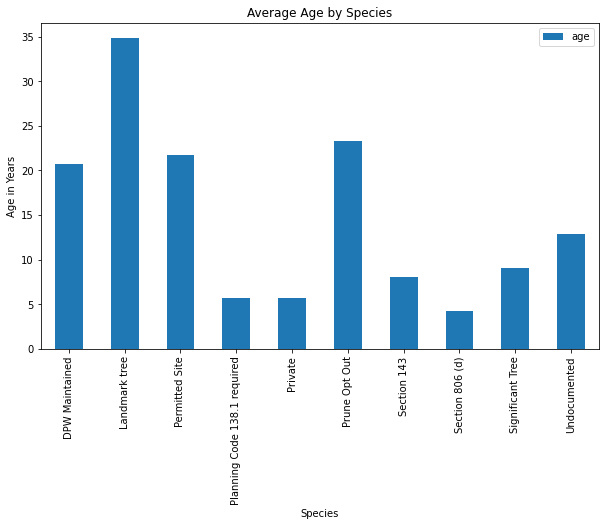

In [48]:
import matplotlib.pyplot as plt

grouped = trees_groupby[["qLegalStatus","age"]].groupby("qLegalStatus").mean()
grouped.plot(kind='bar', title='Average Age by Species',
               ylabel='Age in Years', xlabel='Species', figsize=(10, 6))

In [50]:
grouped = grouped.reset_index()

In [51]:
grouped.to_csv('swz8Processed2.csv')